In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

In [2]:
# read dataset
df = pd.read_csv('Data_Science_Evaluation.csv')
df.sort_values('Profit as % of Cost')

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
65534,Middle East and North Africa,Tunisia,Meat,2017,Online,M,7/19/17,188195216,8/29/17,1,421.89,364.69,421.89,364.69,57.20,0.156846
52553,Europe,Spain,Meat,2011,Offline,H,2/2/11,613381135,2/10/11,1963,421.89,364.69,828170.07,715886.47,112283.60,0.156846
52551,Australia and Oceania,Federated States of Micronesia,Meat,2016,Online,L,7/21/16,614563882,8/23/16,1964,421.89,364.69,828591.96,716251.16,112340.80,0.156846
52550,Sub-Saharan Africa,Eritrea,Meat,2016,Offline,C,7/12/16,736927115,7/31/16,1964,421.89,364.69,828591.96,716251.16,112340.80,0.156846
52532,Europe,Iceland,Meat,2014,Offline,L,4/29/14,327562797,6/4/14,1966,421.89,364.69,829435.74,716980.54,112455.20,0.156846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15005,Central America and the Caribbean,Cuba,Clothes,2011,Online,H,6/25/11,905943620,8/2/11,7704,109.28,35.84,841893.12,276111.36,565781.76,2.049107
52484,Sub-Saharan Africa,Burkina Faso,Clothes,2011,Online,C,11/28/11,252340352,12/28/11,1973,109.28,35.84,215609.44,70712.32,144897.12,2.049107
14983,Australia and Oceania,Solomon Islands,Clothes,2011,Online,L,10/17/11,281657969,10/18/11,7707,109.28,35.84,842220.96,276218.88,566002.08,2.049107
52464,Sub-Saharan Africa,Tanzania,Clothes,2017,Offline,L,6/29/17,608143317,7/3/17,1977,109.28,35.84,216046.56,70855.68,145190.88,2.049107


In [3]:
# describe dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,65535.0,2.013310e+03,2.199086e+00,2.010000e+03,2.011000e+03,2.013000e+03,2.015000e+03,2.017000e+03
Order ID,65535.0,5.529922e+08,2.605409e+08,1.000149e+08,3.267064e+08,5.521281e+08,7.786878e+08,9.999939e+08
Units Sold,65535.0,4.987064e+03,2.890993e+03,1.000000e+00,2.470000e+03,4.983000e+03,7.500000e+03,1.000000e+04
Unit Price,65535.0,2.661925e+02,2.169998e+02,9.330000e+00,8.173000e+01,2.057000e+02,4.372000e+02,6.682700e+02
Unit Cost,65535.0,1.876062e+02,1.756134e+02,6.920000e+00,5.667000e+01,1.171100e+02,2.633300e+02,5.249600e+02
Total Revenue,65535.0,1.326827e+06,1.466334e+06,3.732000e+01,2.764137e+05,7.873129e+05,1.810119e+06,6.682032e+06
Total Cost,65535.0,9.350665e+05,1.146901e+06,2.768000e+01,1.626588e+05,4.659253e+05,1.197962e+06,5.249600e+06
Total Profit,65535.0,3.917610e+05,3.784097e+05,9.640000e+00,9.566828e+04,2.809080e+05,5.632895e+05,1.738700e+06
Profit as % of Cost,65535.0,6.106724e-01,4.668135e-01,1.568455e-01,3.482659e-01,5.658867e-01,6.602742e-01,2.049107e+00


In [4]:
# check how much variables we have in dataset
print(len(df.columns))

16


In [5]:
# list all variables in the dataset
print(list(df.columns))

['Region', 'Country', 'Item Type', 'Fiscal Year', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Profit as % of Cost']


In [7]:
# check if there is Null 
df.isnull().sum()

Region                 0
Country                0
Item Type              0
Fiscal Year            0
Sales Channel          0
Order Priority         0
Order Date             0
Order ID               0
Ship Date              0
Units Sold             0
Unit Price             0
Unit Cost              0
Total Revenue          0
Total Cost             0
Total Profit           0
Profit as % of Cost    0
dtype: int64

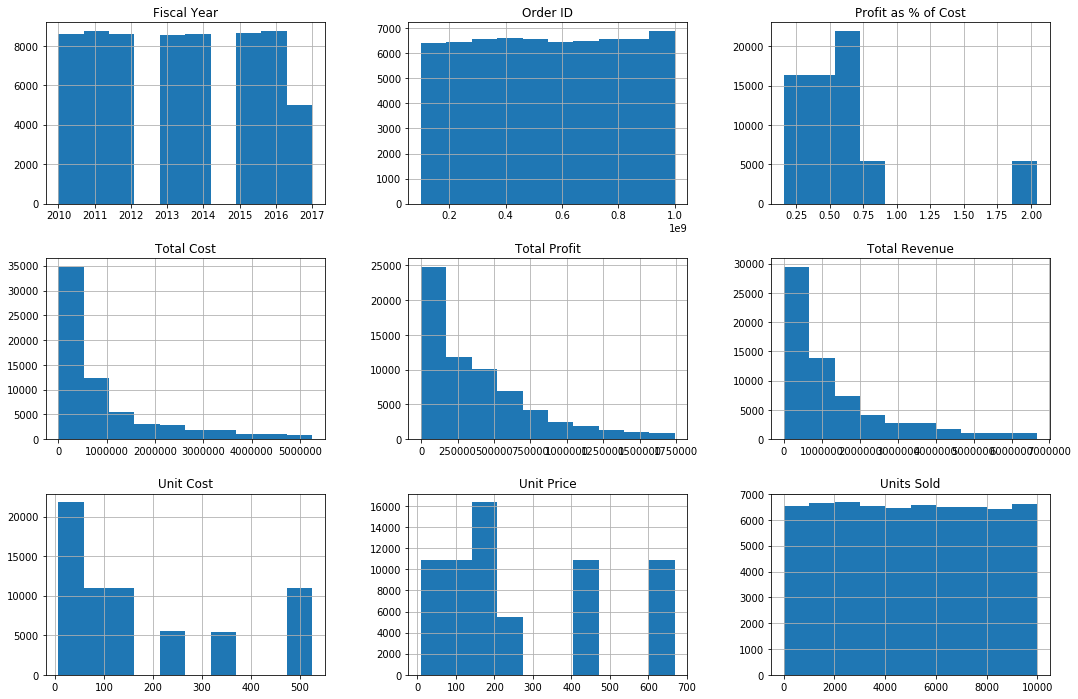

In [8]:
# create a histogram plot, and some of items has high profit as % Cost
df.hist(figsize=(18,12))
plt.show('plot-histogram')

In [9]:
# check what are the items that has higher profit % of cost and Clothes has the highest profit as % of Cost
df.loc[df['Profit as % of Cost'] >= 1.80]

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,1/2/11,293357980,1/22/11,10000,109.28,35.84,1092800.00,358400.00,734400.00,2.049107
7,Australia and Oceania,Tonga,Clothes,2013,Online,H,2/2/13,414538466,3/5/13,9999,109.28,35.84,1092690.72,358364.16,734326.56,2.049107
8,Middle East and North Africa,Pakistan,Clothes,2013,Online,C,5/9/13,868542897,6/17/13,9999,109.28,35.84,1092690.72,358364.16,734326.56,2.049107
20,Sub-Saharan Africa,Mauritania,Clothes,2010,Offline,H,7/11/10,874186265,7/15/10,9997,109.28,35.84,1092472.16,358292.48,734179.68,2.049107
50,Sub-Saharan Africa,Cote d'Ivoire,Clothes,2012,Offline,M,1/22/12,143284738,1/29/12,9993,109.28,35.84,1092035.04,358149.12,733885.92,2.049107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65499,Asia,Singapore,Clothes,2017,Offline,H,3/28/17,111790025,4/7/17,7,109.28,35.84,764.96,250.88,514.08,2.049107
65500,Sub-Saharan Africa,Republic of the Congo,Clothes,2017,Online,H,4/23/17,644700324,4/26/17,7,109.28,35.84,764.96,250.88,514.08,2.049107
65501,Europe,Czech Republic,Clothes,2017,Online,C,5/20/17,277610623,7/6/17,7,109.28,35.84,764.96,250.88,514.08,2.049107
65515,Asia,South Korea,Clothes,2016,Online,L,8/12/16,526797711,8/20/16,4,109.28,35.84,437.12,143.36,293.76,2.049107


In [10]:
# check the lowest profit as % of cost, and most likely Meat has lowest profit as % of cost
df.loc[df['Profit as % of Cost'] <= 0.2]

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
10,Central America and the Caribbean,Costa Rica,Meat,2014,Online,L,5/3/14,351650321,5/31/14,9999,421.89,364.69,4218478.11,3646535.31,571942.8,0.156846
11,Sub-Saharan Africa,Malawi,Meat,2014,Online,M,6/24/14,517470920,7/7/14,9999,421.89,364.69,4218478.11,3646535.31,571942.8,0.156846
24,Sub-Saharan Africa,Mauritania,Meat,2011,Online,C,10/27/11,566571652,11/27/11,9997,421.89,364.69,4217634.33,3645805.93,571828.4,0.156846
42,Sub-Saharan Africa,Ghana,Meat,2011,Offline,H,3/13/11,981579339,4/11/11,9994,421.89,364.69,4216368.66,3644711.86,571656.8,0.156846
51,Sub-Saharan Africa,Zambia,Meat,2013,Offline,L,4/3/13,325123059,4/29/13,9993,421.89,364.69,4215946.77,3644347.17,571599.6,0.156846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65493,Europe,Finland,Meat,2013,Online,C,8/14/13,588638293,9/24/13,7,421.89,364.69,2953.23,2552.83,400.4,0.156846
65509,Sub-Saharan Africa,Sierra Leone,Meat,2012,Online,C,10/29/12,960188615,12/8/12,4,421.89,364.69,1687.56,1458.76,228.8,0.156846
65529,Europe,Montenegro,Meat,2015,Offline,L,1/21/15,347189700,2/26/15,2,421.89,364.69,843.78,729.38,114.4,0.156846
65530,Sub-Saharan Africa,Sudan,Meat,2015,Online,H,5/6/15,678830897,5/14/15,2,421.89,364.69,843.78,729.38,114.4,0.156846


In [11]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

C:\Users\myl94\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

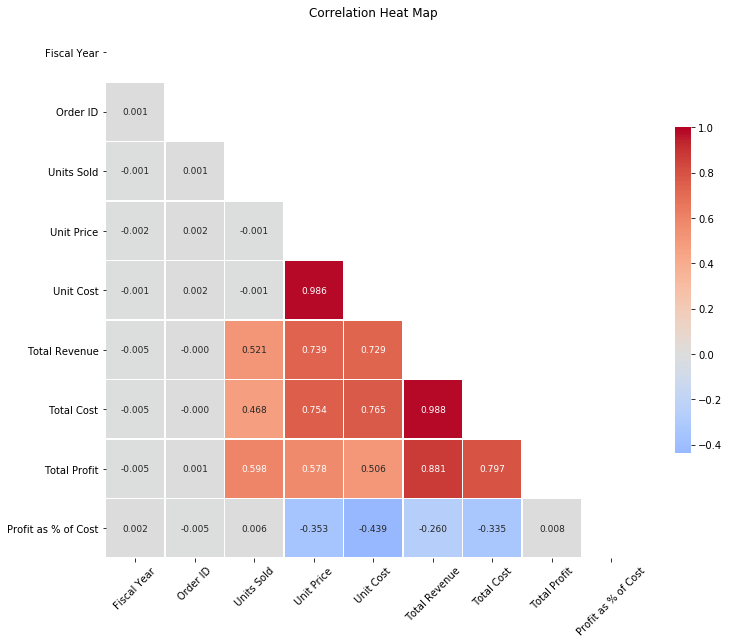

In [12]:
# examine correlations among dataset
# with correlation matrix/heat map
corr_chart(df_corr = df) 

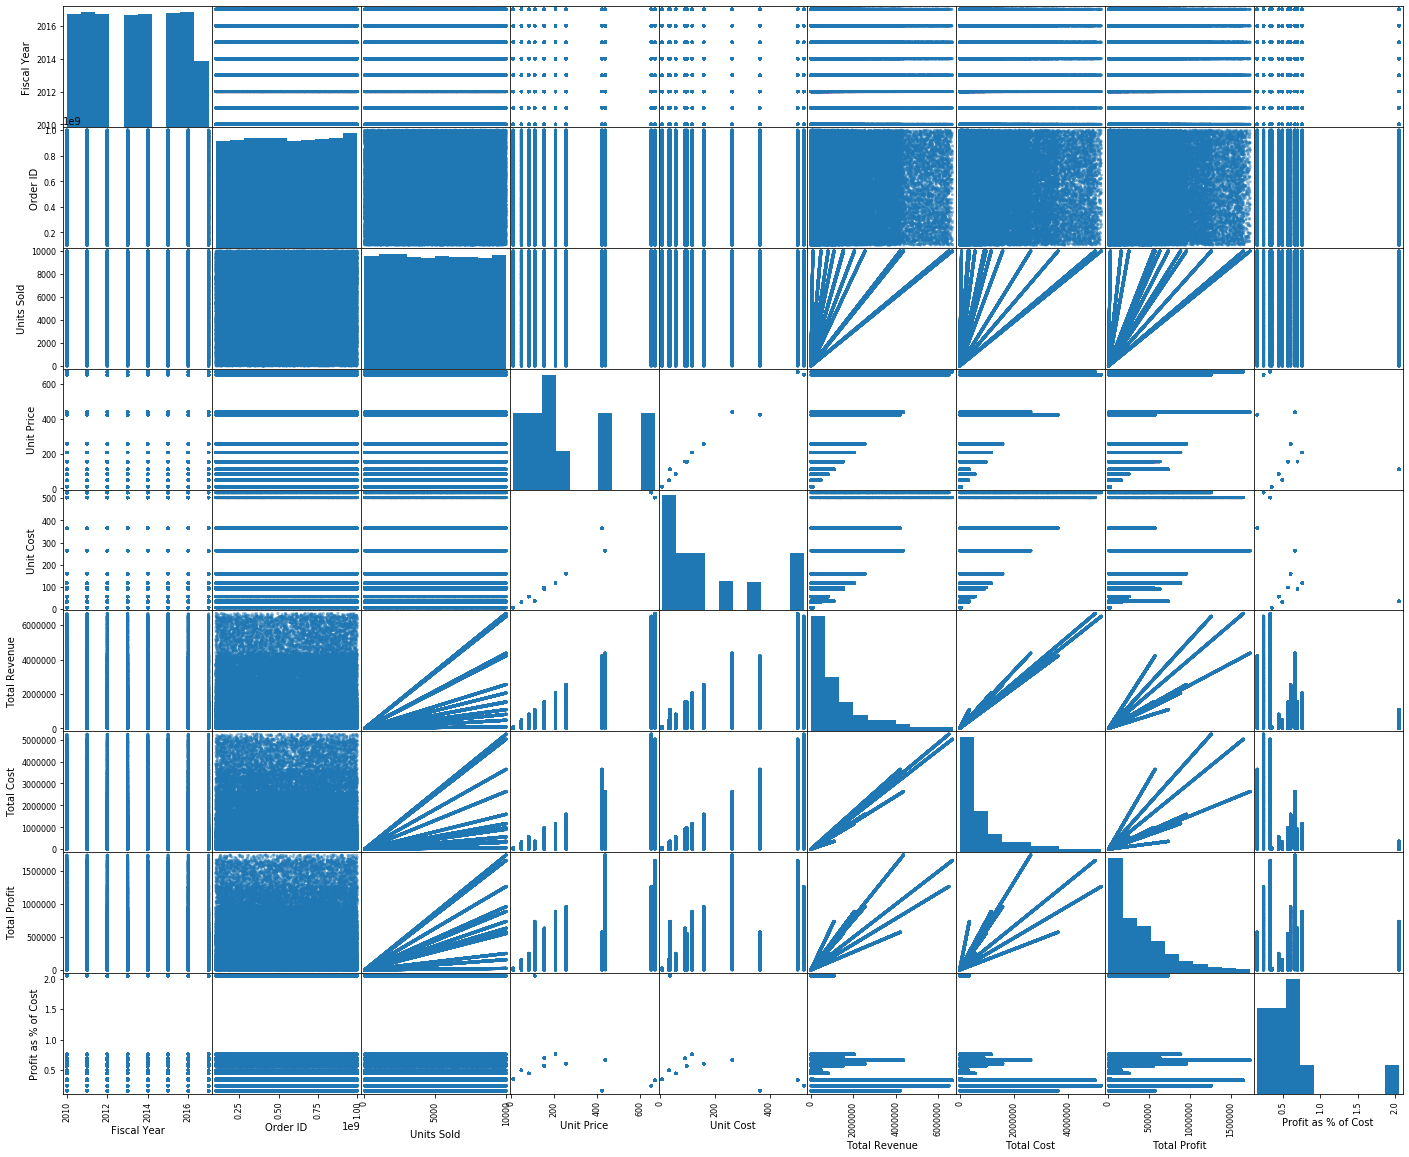

In [13]:
scatter_matrix(df, figsize=(24, 20))
plt.show('Scatter Plot Matrix of products')

In [54]:
# from heatmap, we know that some of the variables we can drop them off, since they are not important.
q1_df=df.drop(['Total Cost','Sales Channel','Country','Fiscal Year','Order Priority','Total Revenue','Unit Cost','Unit Price','Units Sold','Ship Date','Order ID','Order Date','Total Profit'],axis = 1)

In [55]:
q1_df

,Region,Item Type,Profit as % of Cost
0,Sub-Saharan Africa,Snacks,0.565887
1,Sub-Saharan Africa,Snacks,0.565887
2,Central America and the Caribbean,Clothes,2.049107
3,Europe,Office Supplies,0.240495
4,Europe,Cosmetics,0.660274
...,...,...,...
65530,Sub-Saharan Africa,Meat,0.156846
65531,Sub-Saharan Africa,Vegetables,0.694270
65532,Middle East and North Africa,Cereal,0.756468
65533,Sub-Saharan Africa,Snacks,0.565887


In [56]:
# how to get dummies for Regions, Item Type and Sales Channel
one_hot = pd.get_dummies(q1_df['Region'])
# Drop column as it is now encoded
q1_df = q1_df.drop('Region',axis = 1)
# Join the encoded df
q1_df = q1_df.join(one_hot)
q1_df

,Item Type,Profit as % of Cost,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
0,Snacks,0.565887,0,0,0,0,0,0,1
1,Snacks,0.565887,0,0,0,0,0,0,1
2,Clothes,2.049107,0,0,1,0,0,0,0
3,Office Supplies,0.240495,0,0,0,1,0,0,0
4,Cosmetics,0.660274,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
65530,Meat,0.156846,0,0,0,0,0,0,1
65531,Vegetables,0.694270,0,0,0,0,0,0,1
65532,Cereal,0.756468,0,0,0,0,1,0,0
65533,Snacks,0.565887,0,0,0,0,0,0,1


In [57]:
one_hot2 = pd.get_dummies(q1_df['Item Type'])
# Drop column as it is now encoded
q1_df = q1_df.drop('Item Type',axis = 1)
# Join the encoded df
q1_df = q1_df.join(one_hot2)
q1_df

,Profit as % of Cost,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
0,0.565887,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.565887,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,2.049107,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.240495,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.660274,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,0.156846,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
65531,0.694270,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
65532,0.756468,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
65533,0.565887,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
one_hot2

,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65530,0,0,0,0,0,0,0,1,0,0,0,0
65531,0,0,0,0,0,0,0,0,0,0,0,1
65532,0,0,1,0,0,0,0,0,0,0,0,0
65533,0,0,0,0,0,0,0,0,0,0,1,0


C:\Users\myl94\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

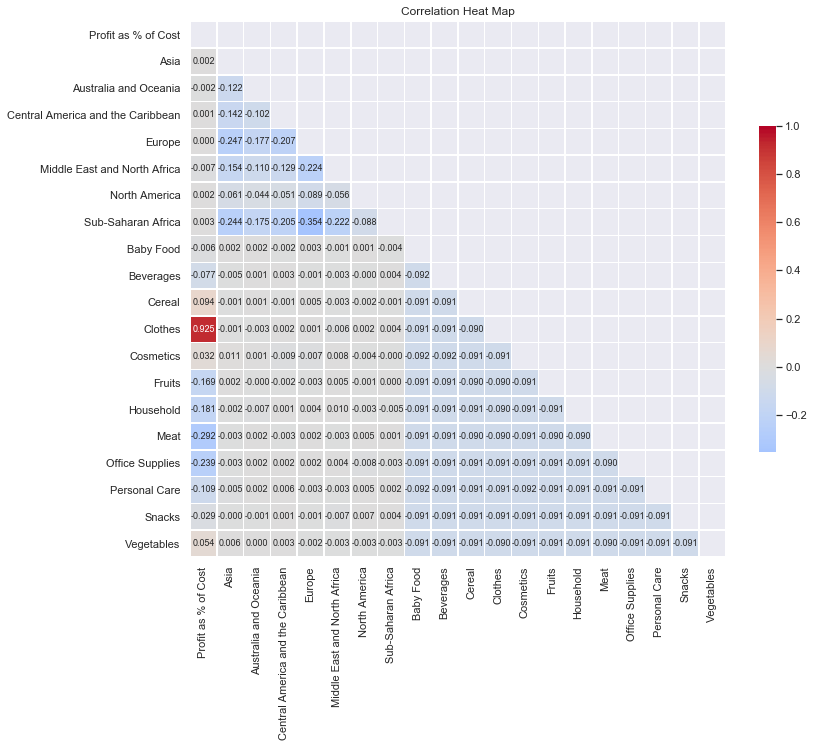

In [59]:
# in the heatmap, we know that clothes has the highest coef,
corr_chart(df_corr = q1_df) 
plt.xticks(rotation=90)

In [22]:
X = q1_df[['Asia','Australia and Oceania','Central America and the Caribbean','Europe','Middle East and North Africa','North America','Sub-Saharan Africa','Baby Food','Beverages','Cereal','Clothes','Cosmetics','Fruits','Household','Meat','Office Supplies','Personal Care','Snacks','Vegetables']]
y= q1_df[['Profit as % of Cost']]

In [63]:
from sklearn.linear_model import LinearRegression
# linear regression check the feature importance
model = LinearRegression()
model.fit(X, y)
# get importance
importance = model.coef_
print(importance)

[[-0.004 -0.004 -0.004 -0.004 -0.004 -0.004 -0.004  0.21   0.102  0.365
   1.658  0.269 -0.043 -0.061 -0.234 -0.151  0.051  0.175  0.303]]


In [65]:
# From the chart below, I know that all regions have the same coefficient, 
features = pd.DataFrame(importance.T, X.columns, columns=['coefficient'])
features

,coefficient
Asia,-0.003762
Australia and Oceania,-0.003762
Central America and the Caribbean,-0.003762
Europe,-0.003762
Middle East and North Africa,-0.003762
North America,-0.003762
Sub-Saharan Africa,-0.003762
Baby Food,0.210301
Beverages,0.101604
Cereal,0.365464


In [69]:
# since we knew that meat has the lowest Profit as % of Cost and lowest coef, and Order ID: 188195216 lowest Total Profit in meat, 
#I think we can drop Order ID: 188195216 off.
# and Clothes has the highest Profit as % of Cost and highest coef, and Order ID: 917634618 has the highest total profit in clothes, 
#so we should sell this more.
df.sort_values('Profit as % of Cost')

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
65534,Middle East and North Africa,Tunisia,Meat,2017,Online,M,7/19/17,188195216,8/29/17,1,421.89,364.69,421.89,364.69,57.20,0.156846
52553,Europe,Spain,Meat,2011,Offline,H,2/2/11,613381135,2/10/11,1963,421.89,364.69,828170.07,715886.47,112283.60,0.156846
52551,Australia and Oceania,Federated States of Micronesia,Meat,2016,Online,L,7/21/16,614563882,8/23/16,1964,421.89,364.69,828591.96,716251.16,112340.80,0.156846
52550,Sub-Saharan Africa,Eritrea,Meat,2016,Offline,C,7/12/16,736927115,7/31/16,1964,421.89,364.69,828591.96,716251.16,112340.80,0.156846
52532,Europe,Iceland,Meat,2014,Offline,L,4/29/14,327562797,6/4/14,1966,421.89,364.69,829435.74,716980.54,112455.20,0.156846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15005,Central America and the Caribbean,Cuba,Clothes,2011,Online,H,6/25/11,905943620,8/2/11,7704,109.28,35.84,841893.12,276111.36,565781.76,2.049107
52484,Sub-Saharan Africa,Burkina Faso,Clothes,2011,Online,C,11/28/11,252340352,12/28/11,1973,109.28,35.84,215609.44,70712.32,144897.12,2.049107
14983,Australia and Oceania,Solomon Islands,Clothes,2011,Online,L,10/17/11,281657969,10/18/11,7707,109.28,35.84,842220.96,276218.88,566002.08,2.049107
52464,Sub-Saharan Africa,Tanzania,Clothes,2017,Offline,L,6/29/17,608143317,7/3/17,1977,109.28,35.84,216046.56,70855.68,145190.88,2.049107


In [25]:
# check the total number of each regions 
df['Region'].value_counts()

Europe                               17260
Sub-Saharan Africa                   17043
Asia                                  9522
Middle East and North Africa          8041
Central America and the Caribbean     6992
Australia and Oceania                 5259
North America                         1418
Name: Region, dtype: int64

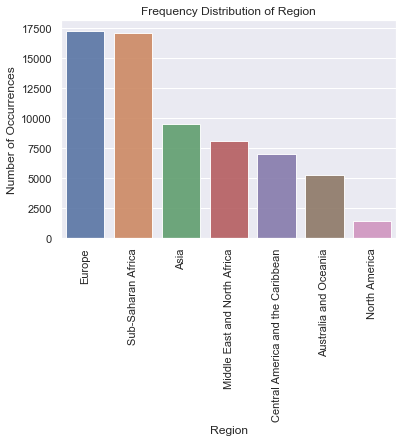

In [26]:
# from the batplot, we know that europe has hte highest number of occurrences, I think Europe and Sub-Saharan Africa should have preference from other regions.
region_count = df['Region'].value_counts()
sns.set(style="darkgrid")
sns.barplot(region_count.index, region_count.values, alpha=0.9)
plt.title('Frequency Distribution of Region')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

In [27]:
# create new dataset and convert date to numeric
q2_df=df[['Region','Order ID','Item Type','Order Date','Ship Date','Units Sold']]
q2_df['Order Date']= pd.to_datetime(df['Order Date']).dt.date
q2_df['Ship Date']= pd.to_datetime(df['Ship Date']).dt.date
q2_df

C:\Users\myl94\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\myl94\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold
0,Sub-Saharan Africa,241891753,Snacks,2010-04-23,2010-04-26,10000
1,Sub-Saharan Africa,530075585,Snacks,2010-06-06,2010-07-01,10000
2,Central America and the Caribbean,293357980,Clothes,2011-01-02,2011-01-22,10000
3,Europe,360841929,Office Supplies,2012-10-02,2012-10-20,10000
4,Europe,707318103,Cosmetics,2016-03-16,2016-05-03,10000
...,...,...,...,...,...,...
65530,Sub-Saharan Africa,678830897,Meat,2015-05-06,2015-05-14,2
65531,Sub-Saharan Africa,814846360,Vegetables,2013-01-07,2013-02-02,1
65532,Middle East and North Africa,550689113,Cereal,2014-06-25,2014-06-27,1
65533,Sub-Saharan Africa,775984799,Snacks,2015-11-06,2015-11-27,1


In [28]:
# calculate the days that item are being processed from order date to ship date
q2_df['process days'] = q2_df['Ship Date']-q2_df['Order Date']
q2_df

C:\Users\myl94\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
0,Sub-Saharan Africa,241891753,Snacks,2010-04-23,2010-04-26,10000,3 days
1,Sub-Saharan Africa,530075585,Snacks,2010-06-06,2010-07-01,10000,25 days
2,Central America and the Caribbean,293357980,Clothes,2011-01-02,2011-01-22,10000,20 days
3,Europe,360841929,Office Supplies,2012-10-02,2012-10-20,10000,18 days
4,Europe,707318103,Cosmetics,2016-03-16,2016-05-03,10000,48 days
...,...,...,...,...,...,...,...
65530,Sub-Saharan Africa,678830897,Meat,2015-05-06,2015-05-14,2,8 days
65531,Sub-Saharan Africa,814846360,Vegetables,2013-01-07,2013-02-02,1,26 days
65532,Middle East and North Africa,550689113,Cereal,2014-06-25,2014-06-27,1,2 days
65533,Sub-Saharan Africa,775984799,Snacks,2015-11-06,2015-11-27,1,21 days


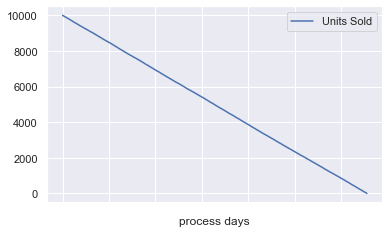

In [29]:
# in the graph, the shorter process days, has the highest units sold.
q2_df.plot('process days','Units Sold')

In [31]:
# I_d = q2_df.groupby(['Region','Item Type','deliver days']).sum()
# I_d

In [37]:
# Since Order ID 977895915 has only 0 days process day and sold the most, so this order is easiest to sell in Asia
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'Asia'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
101,Asia,977895915,Cosmetics,2013-10-21,2013-10-21,9987,0 days
367,Asia,278860747,Clothes,2016-01-17,2016-01-17,9947,0 days
376,Asia,628749978,Baby Food,2017-01-09,2017-01-09,9946,0 days
1071,Asia,871921622,Cosmetics,2011-01-09,2011-01-09,9839,0 days
1319,Asia,725362718,Vegetables,2015-08-21,2015-08-21,9802,0 days
...,...,...,...,...,...,...,...
64528,Asia,774701201,Meat,2014-02-06,2014-02-06,156,0 days
64587,Asia,721781861,Beverages,2015-08-28,2015-08-28,147,0 days
65117,Asia,375744712,Household,2011-04-17,2011-04-17,65,0 days
65127,Asia,373379218,Clothes,2015-07-05,2015-07-05,63,0 days


In [35]:
# Since Order ID 379968440 has only 0 days process day and sold the most, so this order is easiest to sell in Europe
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'Europe'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
286,Europe,379968440,Cosmetics,2013-10-18,2013-10-18,9960,0 days
679,Europe,274873054,Beverages,2013-07-15,2013-07-15,9900,0 days
969,Europe,273250854,Cereal,2014-05-20,2014-05-20,9855,0 days
1190,Europe,326913487,Clothes,2017-01-12,2017-01-12,9821,0 days
1259,Europe,623883378,Vegetables,2011-12-30,2011-12-30,9810,0 days
...,...,...,...,...,...,...,...
64219,Europe,472257030,Baby Food,2015-10-18,2015-10-18,204,0 days
64472,Europe,675587356,Meat,2013-10-25,2013-10-25,166,0 days
64924,Europe,930214822,Household,2011-02-18,2011-02-18,92,0 days
65028,Europe,124597680,Beverages,2012-04-11,2012-04-11,77,0 days


In [36]:
# Since Order ID 171028220 has only 0 days process day and sold the most, so this order is easiest to sell in Sub-Saharan Africa
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'Sub-Saharan Africa'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
648,Sub-Saharan Africa,171028220,Cereal,2014-02-10,2014-02-10,9906,0 days
1404,Sub-Saharan Africa,426398980,Vegetables,2015-08-19,2015-08-19,9789,0 days
1428,Sub-Saharan Africa,773922717,Household,2013-04-04,2013-04-04,9785,0 days
1581,Sub-Saharan Africa,178360736,Meat,2016-08-08,2016-08-08,9760,0 days
1834,Sub-Saharan Africa,381691062,Baby Food,2014-08-17,2014-08-17,9722,0 days
...,...,...,...,...,...,...,...
64394,Sub-Saharan Africa,422074830,Snacks,2011-06-13,2011-06-13,177,0 days
64614,Sub-Saharan Africa,475737464,Meat,2014-02-04,2014-02-04,142,0 days
64991,Sub-Saharan Africa,720531308,Meat,2014-10-26,2014-10-26,81,0 days
65217,Sub-Saharan Africa,274637019,Cosmetics,2013-07-16,2013-07-16,52,0 days


In [39]:
# Since Order ID 481076133 has only 0 days process day and sold the most, so this order is easiest to sell in Central America and the Caribbean
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'Central America and the Caribbean'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
202,Central America and the Caribbean,481076133,Personal Care,2011-07-19,2011-07-19,9973,0 days
633,Central America and the Caribbean,723504483,Household,2016-06-26,2016-06-26,9909,0 days
1326,Central America and the Caribbean,131794583,Personal Care,2016-06-13,2016-06-13,9801,0 days
2167,Central America and the Caribbean,831437432,Vegetables,2012-07-10,2012-07-10,9667,0 days
2274,Central America and the Caribbean,375709521,Snacks,2014-08-26,2014-08-26,9651,0 days
...,...,...,...,...,...,...,...
63072,Central America and the Caribbean,319616162,Cereal,2011-03-07,2011-03-07,380,0 days
63300,Central America and the Caribbean,370913302,Snacks,2010-06-22,2010-06-22,344,0 days
63497,Central America and the Caribbean,977052199,Cosmetics,2015-06-30,2015-06-30,313,0 days
63933,Central America and the Caribbean,319480550,Fruits,2012-11-11,2012-11-11,249,0 days


In [40]:
# Since Order ID 128449761 has only 0 days process day and sold the most, so this order is easiest to sell in Central America and the Middle East and North Africa
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'Middle East and North Africa'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
45,Middle East and North Africa,128449761,Beverages,2016-06-19,2016-06-19,9994,0 days
400,Middle East and North Africa,626384484,Cereal,2013-09-02,2013-09-02,9943,0 days
432,Middle East and North Africa,773686683,Beverages,2013-04-05,2013-04-05,9937,0 days
752,Middle East and North Africa,921732175,Snacks,2017-01-20,2017-01-20,9888,0 days
863,Middle East and North Africa,531122720,Baby Food,2010-01-01,2010-01-01,9870,0 days
...,...,...,...,...,...,...,...
62526,Middle East and North Africa,624561440,Fruits,2011-02-28,2011-02-28,464,0 days
63143,Middle East and North Africa,570763194,Snacks,2010-03-12,2010-03-12,368,0 days
63563,Middle East and North Africa,528420770,Office Supplies,2012-07-18,2012-07-18,303,0 days
64625,Middle East and North Africa,318973290,Baby Food,2016-03-24,2016-03-24,140,0 days


In [42]:
# Since Order ID 875773704 has only 0 days process day and sold the most, so this order is easiest to sell inAustralia and Oceania
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'Australia and Oceania'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
1610,Australia and Oceania,875773704,Cosmetics,2015-03-19,2015-03-19,9755,0 days
1822,Australia and Oceania,229657876,Vegetables,2015-11-24,2015-11-24,9724,0 days
1884,Australia and Oceania,176738536,Household,2017-06-14,2017-06-14,9715,0 days
2180,Australia and Oceania,674673259,Snacks,2014-08-27,2014-08-27,9665,0 days
2328,Australia and Oceania,431366002,Beverages,2014-10-07,2014-10-07,9641,0 days
...,...,...,...,...,...,...,...
60926,Australia and Oceania,521359479,Meat,2014-04-06,2014-04-06,710,0 days
62931,Australia and Oceania,671499240,Clothes,2017-03-15,2017-03-15,402,0 days
63451,Australia and Oceania,523318135,Cereal,2015-02-03,2015-02-03,320,0 days
64814,Australia and Oceania,927477681,Fruits,2017-01-12,2017-01-12,111,0 days


In [43]:
# Since Order ID 227799642 has only 0 days process day and sold the most, so this order is easiest to sell in North America
q2_df.loc[((q2_df['process days'] == '0 days')&(q2_df['Region'] == 'North America'))]

,Region,Order ID,Item Type,Order Date,Ship Date,Units Sold,process days
1120,North America,227799642,Household,2016-09-30,2016-09-30,9831,0 days
3166,North America,875130832,Cereal,2012-09-08,2012-09-08,9515,0 days
8491,North America,985630118,Meat,2015-06-09,2015-06-09,8710,0 days
9168,North America,944030988,Cosmetics,2014-06-02,2014-06-02,8603,0 days
10021,North America,796593177,Meat,2016-07-05,2016-07-05,8478,0 days
10411,North America,891719329,Clothes,2014-04-14,2014-04-14,8420,0 days
13324,North America,598194682,Snacks,2013-05-30,2013-05-30,7955,0 days
14827,North America,196737086,Fruits,2016-07-01,2016-07-01,7731,0 days
17357,North America,251615083,Office Supplies,2015-10-09,2015-10-09,7349,0 days
20992,North America,604070651,Personal Care,2015-11-23,2015-11-23,6784,0 days


In [49]:
# calculate the sum of units solds for each item type in each region.
dff = q2_df.groupby(["Region","Item Type"]).sum().reset_index()
dff

,Region,Item Type,Order ID,Units Sold
0,Asia,Baby Food,445720381489,3893632
1,Asia,Beverages,429354545743,3731819
2,Asia,Cereal,431845848965,3998915
3,Asia,Clothes,429940263054,3963723
4,Asia,Cosmetics,476234016706,4234542
...,...,...,...,...
79,Sub-Saharan Africa,Meat,787766143819,7036332
80,Sub-Saharan Africa,Office Supplies,767281585180,7118562
81,Sub-Saharan Africa,Personal Care,795301888974,7142170
82,Sub-Saharan Africa,Snacks,807264942966,7287360


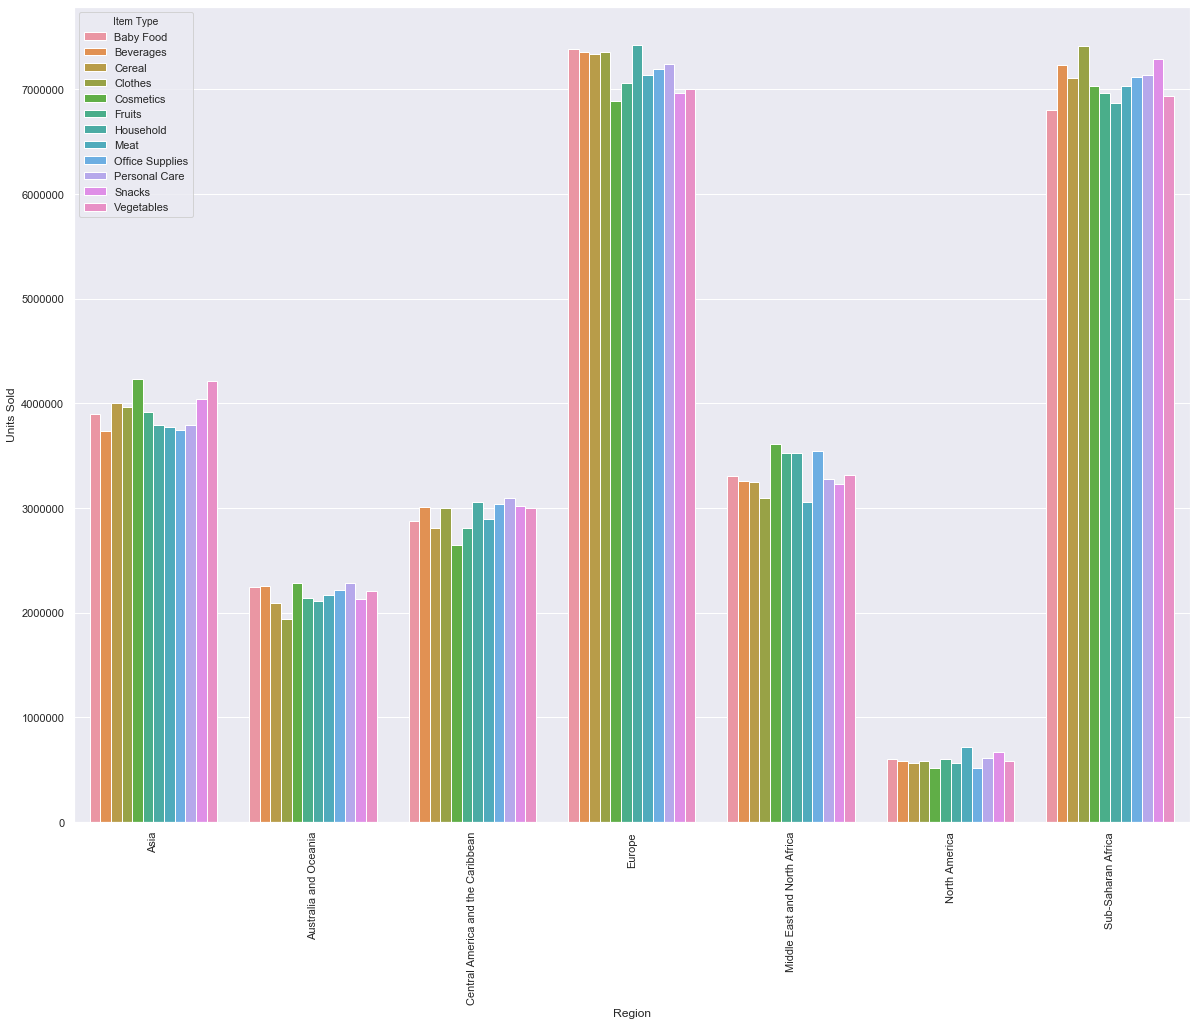

In [71]:
# create barplot for above dataset, and we know that overall Europe and Sub-Saharan Africa has the most Unit sold.
# North America has the lowest Unit sold.
# In Asia, Cosmetics and Vegetables have the highest unit sold number
# in Australia and Oceania, Cosmetics and Personal cares have the highest unit solds number
# in Central America and the Caribbean, Personal care have the highest units sold number.
# in Europe, Cosmetics have the highest units sold number
# in Middle East and North Africa, household have the highest units solds number
# in North American, Meat have the highest units solds number.
# in Sub-Saharan Africa, Clothes have the highest units solds number
sns.set(rc={'figure.figsize':(20,15)})
chart = sns.barplot(x = dff['Region'],
            y = dff['Units Sold'],
            hue = dff['Item Type'],
            data = dff)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
# Show the plot
plt.show()